# Assignment 2 WBT 
# Name: Moses Mbabaali 
# Matricola: 4846019

In [2]:
# Task 1 
# Generate sample data
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt


centers = [[1, 1], [-1, -1], [1, -1]]
X, y = make_blobs(n_samples=1500, centers=centers, cluster_std=0.4,random_state=0)

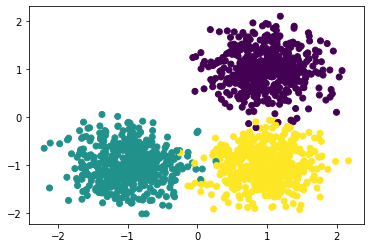

In [3]:
plt.scatter(X[:,0],X[:,1], c=y)

In [4]:
# Task 2 
import numpy as np
rawdata=np.loadtxt('semeion.data');
x=rawdata[:,0:256].copy()
t=rawdata[:,-10:rawdata.shape[1]].copy()
del(rawdata)
t=np.sign(t-.5)

In [5]:
X.shape[1]

2

In [6]:
def Kmeans_c(clusters, iterations, X):
    """ 
        The function takes in 3 inputs
        clusters: Number of clusters to be clustered on. 
        iterations: The number of iterations to choose the best model
        X: The data to be clustered
        
    """
    km = []
    models = []
    for i in range(iterations+1):
        centroids = np.random.rand(clusters,X.shape[1])
        from sklearn.cluster import KMeans
        kmeans = KMeans(n_clusters=clusters, random_state=0, init = centroids, n_init=1).fit(X)
        km.append(kmeans.inertia_)
        models.append(kmeans)
    
    min_in = min(km)
    low_iner_mod = models[km.index(min_in)]
    
    print("Inertia for the models")
    print(km)
    print()
    
    print("Min Inertia")
    print(min_in)
    
    print()
    print("Low Inertia model")
    print(low_iner_mod)
    
    return low_iner_mod 
        
best_model = Kmeans_c(6, 10, X)

Inertia for the models
[310.17201769595425, 311.3391568359371, 311.29700603673655, 313.2629805676153, 313.42590167696886, 312.0873871075589, 310.3588737019416, 313.0447381476135, 312.14184565955566, 304.6583148278513, 314.43814069701256]

Min Inertia
304.6583148278513

Low Inertia model
KMeans(init=array([[0.36597787, 0.47130469],
       [0.94071208, 0.3788118 ],
       [0.55815762, 0.27089643],
       [0.99818776, 0.30812918],
       [0.68152483, 0.04728468],
       [0.56705193, 0.3735124 ]]),
       n_clusters=6, n_init=1, random_state=0)


In [7]:
# Distortion 
best_model.inertia_

304.6583148278513

In [8]:
# Number of clusters
best_model.cluster_centers_

array([[-1.012904  , -1.00010396],
       [ 1.27413041,  1.10911613],
       [ 1.08357066, -0.57557011],
       [ 1.22620366, -1.2735374 ],
       [ 0.48701833, -1.09048929],
       [ 0.66918705,  0.92129475]])

In [9]:
# Number of iterations 
best_model.n_iter_

16

In [10]:
# Predictions 
predict = best_model.predict(X)
predict

array([0, 3, 0, ..., 5, 0, 1], dtype=int32)

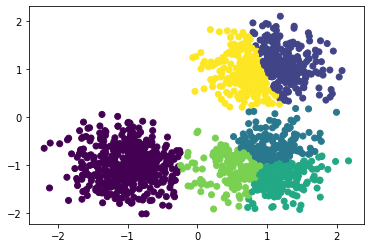

In [11]:
# Plot the predictions
plt.scatter(X[:,0],X[:,1], c=predict)

In [103]:
#cluster_membership = np.argmax(u, ax
def fcmeans(X,clusters):
    """ This function takes in 2 variables 
        X: This is the data as a numpy array 
        clusters: This is the number of clusters as ints 
        """
    
    from fcmeans import FCM
    fcm = FCM(n_clusters=clusters)
    fcm.fit(X)
    centers = fcm.centers
    pred = fcm.predict(X)
    print("Centers")
    f, axes = plt.subplots(1, 2, figsize=(11,5))
    axes[0].scatter(X[:,0], X[:,1])
    axes[1].scatter(X[:,0], X[:,1], c=pred)
    axes[1].scatter(centers[:,0], centers[:,1], marker="+", s=500, c='r' )
    plt.show()
    return centers, pred

Centers


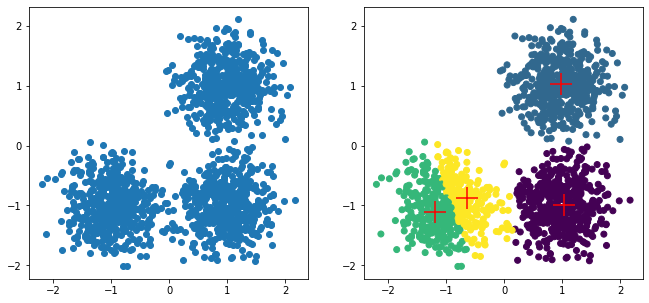

(DeviceArray([[ 1.0260841 , -0.9995217 ],
              [ 0.98204994,  1.0235808 ],
              [-1.1940713 , -1.1051148 ],
              [-0.63295126, -0.87647283]], dtype=float32),
 DeviceArray([3, 0, 3, ..., 1, 2, 1], dtype=int32))

In [105]:
fcmeans(X,4)

For i  1
Centers


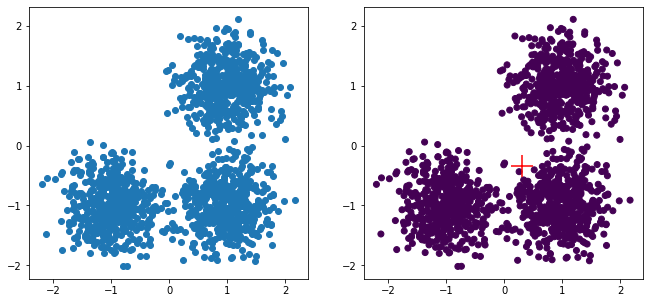

For i  2
Centers


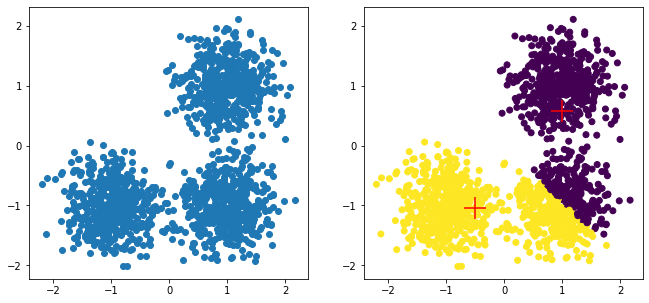

For i  3
Centers


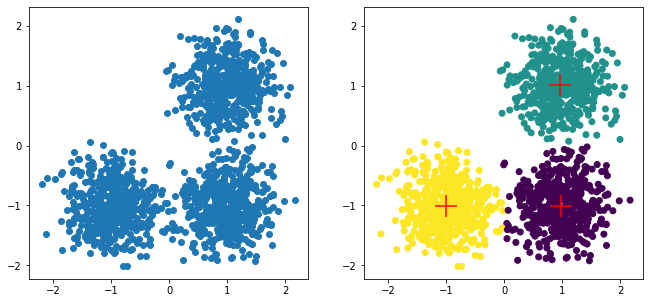

For i  4
Centers


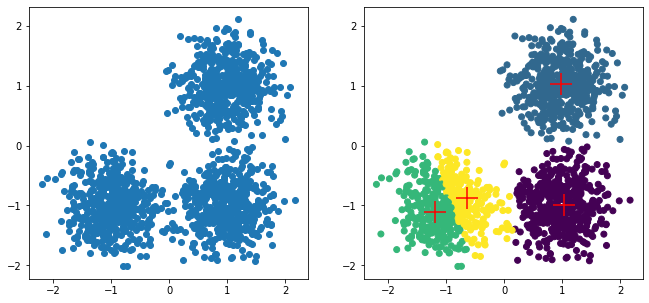

For i  5
Centers


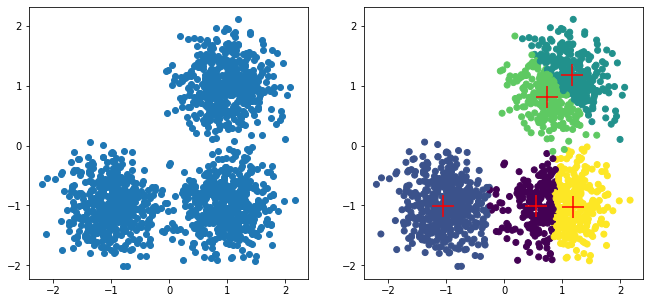

In [14]:
#Trying the algorithm out on different clusters 
for i in range(5):
    print("For i ", i+1)
    fcmeans(X,i+1)
 

In [15]:
def PossiblisticC(data, nclusters,centroids, iterations):
    """ This function takes in 4 variables 
        data : This is the data to be clustered as a numpy array.
        nclusters: The number of clusters as an int
        centroids: The initial centers as numpy array
        iterations: The max iteration as an int """
    
    from skcmeans.algorithms import Possibilistic
    clusters = Possibilistic(n_clusters=nclusters, n_init=5, max_iter=iterations)
    fitd = clusters.fit(data)
    membership = fitd.calculate_memberships(data)
    centers = fitd.calculate_centers(data)
    #print(centers)
    
    return membership, centers

In [16]:
type (np.random.rand(2,2))

numpy.ndarray

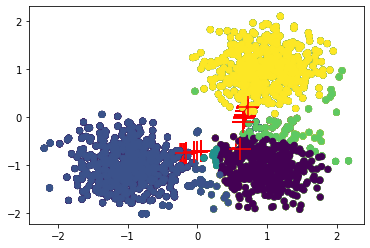

In [94]:
def use_posbc(itera,clusters,data):
    """ This function takes in 2 variables 
        itera: Number of iterations as an int
        clusters: As an int """
    
    res = []
    for i in range(itera):
        initC = np.random.rand(clusters,2)*10
        membership = PossiblisticC(data,clusters,initC,5)
        res.append(membership[0])
        for j in res:
            plabels = np.argmax(j, axis=1)
            plt.scatter(data[:,0], data[:,1], c=plabels)
            plt.scatter(membership[1][:,0], membership[1][:,1], marker="+", s=500, c='r' )
    
    return plabels  
        
    
labs = use_posbc(5,5,X)

In [102]:
indices = np.where(labs == 0)
X[indices]

array([[ 1.33045028, -1.02310262],
       [ 0.94094503, -0.54727522],
       [ 1.19864608, -0.59514672],
       [ 0.92656369, -0.86992051],
       [ 0.72359207, -1.88220214],
       [ 1.09784414, -1.3119693 ],
       [ 0.92462037, -1.470334  ],
       [ 1.44140151, -1.2301024 ],
       [ 0.86270598, -0.97169037],
       [ 0.6266735 , -1.01379002],
       [ 0.98216024, -0.89594684],
       [ 0.47178986, -0.80036629],
       [ 0.3475122 , -1.12058893],
       [ 0.63174945, -0.63122608],
       [ 0.82083406, -1.07948602],
       [ 0.63701361, -1.07696168],
       [ 0.86689649, -1.08160315],
       [ 1.17324749, -1.08407553],
       [ 1.0554981 , -1.50972775],
       [ 1.19847176, -0.76921764],
       [ 1.15446655, -0.95965317],
       [ 0.79851623, -1.23480652],
       [ 0.8323672 , -0.84115751],
       [ 1.45782141, -1.00750682],
       [ 1.26001679, -1.14566792],
       [ 0.80992996, -0.4908185 ],
       [ 0.87149643, -1.19542649],
       [ 1.40888414, -1.16697178],
       [ 1.3253809 ,

## Task 4

In [69]:
from sklearn.decomposition import PCA
reduced_data = PCA(n_components=2).fit_transform(x)
reduced_data.shape

(1593, 2)

## Possiblistic Cmeans

In [54]:
from sklearn.datasets import load_digits

data, labels = load_digits(return_X_y=True)
(n_samples, n_features), n_digits = data.shape, np.unique(labels).size

print(
    f"# digits: {n_digits}; # samples: {n_samples}; # features {n_features}"
)

# digits: 10; # samples: 1797; # features 64


In [119]:
type(data)

numpy.ndarray

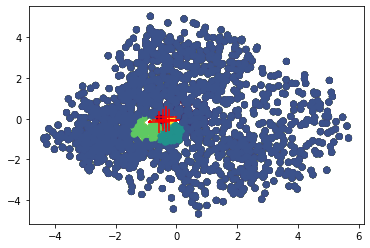

In [115]:
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(x)
test = use_posbc(5,5,reduced_data)

In [125]:
vis = x[np.where(test == 0)]

In [147]:
vis[0]

array([0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 1., 1., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1.,
       1., 1., 0., 1., 1.

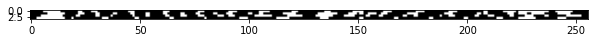

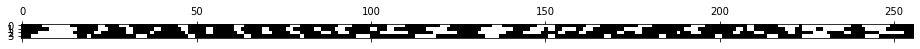

In [167]:
import matplotlib.pyplot as plt 
from matplotlib.pyplot import figure

fig, ax = plt.subplots(figsize=(10, 20))
#plt.figure(figsize=(8, 6), dpi=80)
ax.imshow(vis, cmap='gray')
plt.matshow(vis)
#plt.show()

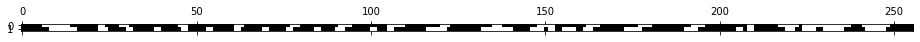

In [149]:
%matplotlib inline

In [141]:
for i in vis:
    #plt.imshow(i, cmap=plt.cm.binary)
    print("Printing i:",i)

Printing i: [0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1.
 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0.
 0. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0.
 0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0.]
Printing i: [0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 1. 1.
 1. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 1. 1.
 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0

## Cmeans

For i  1
Centers


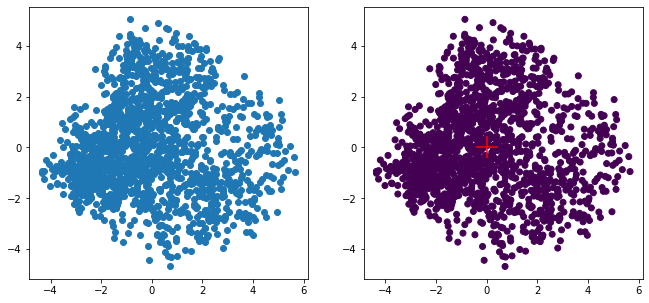

For i  2
Centers


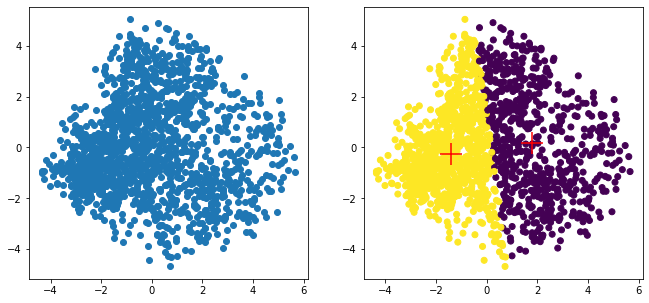

For i  3
Centers


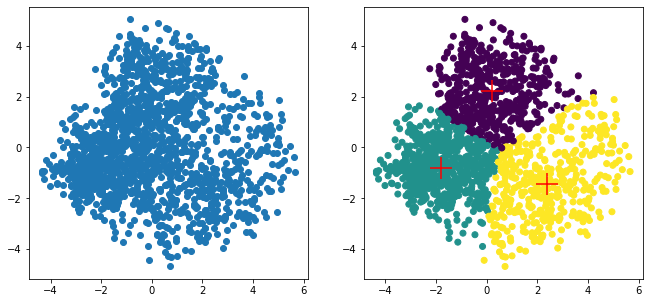

For i  4
Centers


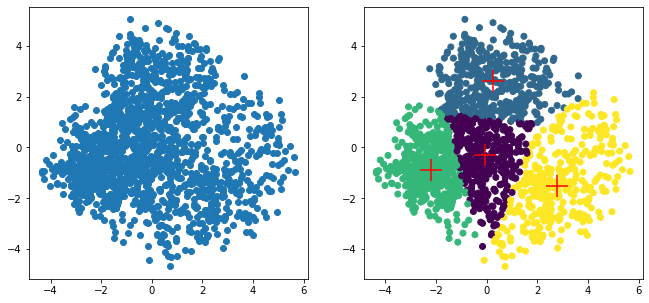

For i  5
Centers


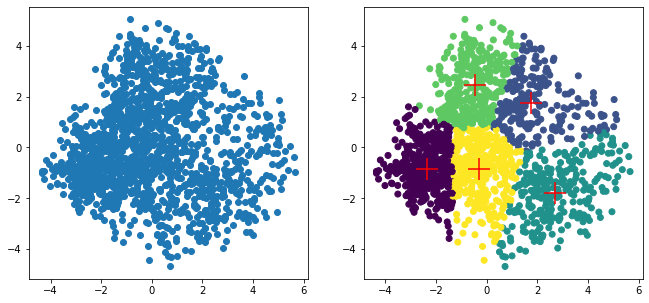

In [108]:
def use_cmeans(itera,data):
    for i in range(itera):
        print("For i ", i+1)
        fcmeans(data,i+1)
use_cmeans(5,reduced_data)      

## Kmeans

In [90]:
best_modelt = Kmeans_c(10, 10, reduced_datar)

Inertia for the models
[56277.8242614765, 57549.10876801116, 56387.332290633865, 57950.022421883026, 56386.51808252466, 56387.332290633865, 58659.82978105827, 60508.21397659347, 56384.59229864859, 57845.02093130608, 56360.9753733418]

Min Inertia
56277.8242614765

Low Inertia model
KMeans(init=array([[0.71080825, 0.13615607],
       [0.72810473, 0.99817817],
       [0.47894489, 0.15068241],
       [0.28840912, 0.14667872],
       [0.34725539, 0.72846033],
       [0.93969415, 0.20640419],
       [0.84156709, 0.03434925],
       [0.920937  , 0.26564636],
       [0.92560379, 0.56652789],
       [0.60086737, 0.9123399 ]]),
       n_clusters=10, n_init=1, random_state=0)


In [91]:
# Predictions 
predictc = best_modelt.predict(reduced_datar)
np.unique(predictc)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int32)

In [92]:
#reduced_datar.explained_variance_rati
pca.explained_variance_ratio_

array([0.07828544, 0.06658118])

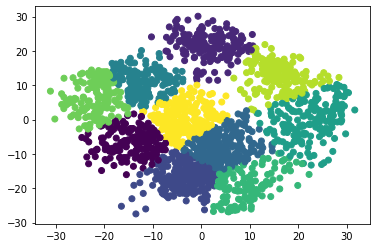

In [93]:
# Plot the predictions
plt.scatter(reduced_datar[:,0],reduced_datar[:,1], c=predictc)